<a href="https://colab.research.google.com/github/tanishkaswami/tanishkaswami.github.io/blob/main/Copy_of_cross_section_of_3d_plane_of_heat_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

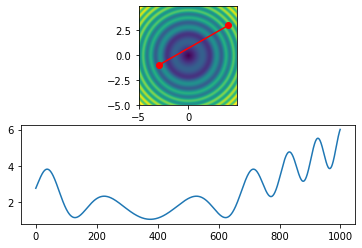

In [ ]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

# Generate some data...
x, y = np.mgrid[-5:5:0.1, -5:5:0.1]
z = np.sqrt(x**2 + y**2) + np.sin(x**2 + y**2)

# Coordinates of the line we'd like to sample along
line = [(-3, -1), (4, 3)]

# Convert the line to pixel/index coordinates
x_world, y_world = np.array(list(zip(*line)))
col = z.shape[1] * (x_world - x.min()) / x.ptp()
row = z.shape[0] * (y_world - y.min()) / y.ptp()

# Interpolate the line at "num" points...
num = 1000
row, col = [np.linspace(item[0], item[1], num) for item in [row, col]]

# Extract the values along the line, using cubic interpolation
zi = scipy.ndimage.map_coordinates(z, np.vstack((row, col)))

# Plot...
fig, axes = plt.subplots(nrows=2)
axes[0].pcolormesh(x, y, z)
axes[0].plot(x_world, y_world, 'ro-')
axes[0].axis('image')

axes[1].plot(zi)

plt.show()